# Apertura de las bases de datos.

## Importación de librerías.

In [4]:
# Se descargan las librerías necesarias.

# ! pip install openpyxl
# ! pip install scipy}
# ! pip install seaborn

In [5]:
# Se importan las librerías a utilizar.
import pandas as pd
import numpy as np
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Se extraen la rutas de los archivos
ruta_homicidios = "../Data/Originales/homicidios.xlsx"
ruta_lesiones = "../Data/Originales/lesiones.xlsx"

# Revisión de las bases de datos

## Homicidios - hechos

### Revisión de la base de datos.

In [81]:
# Se convierte la base de datos en un dataframe de pandas y se observa la composición de las primeras líneas de la base de datos.
hechos = pd.read_excel(ruta_homicidios, sheet_name= "HECHOS")
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [82]:
# Se observa la composición de las variables de la base de datos y el tipo de dato. 
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [83]:
# Como algunas de las columnas no retornan el tipo de dato que se esperaría, se decide revisar que el formato esté correctamente formateado. 
print(f"El tipo de dato de la columna 'hora' es: {type(hechos.loc[1,"HORA"])}")
print(f"El tipo de dato de la columna 'pox x' es: {type(hechos.loc[1,"pos x"])}")
print(f"El tipo de dato de la columna 'pos y' es: {type(hechos.loc[1,"pos y"])}")

El tipo de dato de la columna 'hora' es: <class 'datetime.time'>
El tipo de dato de la columna 'pox x' es: <class 'str'>
El tipo de dato de la columna 'pos y' es: <class 'str'>


In [84]:
# Es de notar que tanto en "Pos X" como en "Pos Y" hay datos que no presentan información, sino únicamente un "." (punto) sin información.
hechos[hechos["pos x"] == "."]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [85]:
# Como las columnas "pos x" y "pos y" aparecen como tipo string, se convierten a tipo float, corrigiendo los valores nulos.
hechos["pos x"] = pd.to_numeric(hechos["pos x"], errors='coerce')
hechos["pos y"] = pd.to_numeric(hechos["pos y"], errors='coerce')

In [86]:
# Se observa el resultado para los datos nulos.
hechos[hechos["pos x"].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [87]:
# Se transforman los nombres para "pos x" y "pos y" por "latitud" y "longitud"
hechos.rename(columns={"pos x":"longitud","pos y":"latitud"},inplace=True)

In [88]:
# Se revisan si existen filas duplicadas.
duplicados = hechos.duplicated()
print(hechos[duplicados])

# En este caso no se observan filas completas duplicadas, por lo que se decide revisar si existen ID duplicados. 
id_duplicados = hechos.duplicated(subset="ID")
print(hechos[id_duplicados])

# En este caso no se observan que existan filas de hechos duplicados. 

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), longitud, latitud, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), longitud, latitud, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


In [89]:
# Se observa la distribución de la base de datos.
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA,longitud,latitud
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000,-58.356082,-34.534654
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050,0.046144,0.035289


De este primer vistado de los resultados de las columnas, salta a la vista que en la columna "COMUNA" se presentan datos en 0, los cuales al ser observados (véase la celda de código de abajo), son dos datos cuya información no aparece completa. Se deciden eliminar estos dos registros ya que al no tener tampoco información en las columnas "Latitud" y "Longitud" no podría ser usado posteriormente para análisis.

In [90]:
# Se observan los datos que cumplen con la condición de tener la comuna en 0.
hechos[hechos["COMUNA"] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD


In [91]:
# Se filtran estos datos del data set para tener aquellos que no presentan esta condición.
hechos = hechos[hechos["COMUNA"] != 0]

In [92]:
# Se observan datos resultantes. 
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     694 non-null    object        
 1   N_VICTIMAS             694 non-null    int64         
 2   FECHA                  694 non-null    datetime64[ns]
 3   AAAA                   694 non-null    int64         
 4   MM                     694 non-null    int64         
 5   DD                     694 non-null    int64         
 6   HORA                   694 non-null    object        
 7   HH                     694 non-null    object        
 8   LUGAR_DEL_HECHO        694 non-null    object        
 9   TIPO_DE_CALLE          694 non-null    object        
 10  Calle                  694 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Dirección 

Existen datos nulos en Altura y Cruce, pero no se trabajan directamenteo por:
- En el caso de **Altura**, los datos nulos no resultan un impedimento ya que se puede identificar el punto donde ocurrió el accidente gracias a los datos en Latitud y Longitud. 
- En el caso de **Cruce**, se entiende que aquellos datos nulos son aquellos que no corresponden a un cruce (de acuerdo a la información proporcionado por el diccionario).

Para el caso de PARTICIPANTES, se observan que existen datos donde tanto el conductor como la víctima se encuentran sin identificar. Se observa su incidencia a continuación: 

In [93]:
# Se filtra la base para observar la ocurrencia de este tipo de dato en la columna de participantes.
print(hechos[hechos["PARTICIPANTES"] == "SD-SD"])

# Sólo se presentan 4 columnas de datos de este tipo, por lo que se considera que no afectan la base y se eliminan.
hechos = hechos[hechos["PARTICIPANTES"] != "SD-SD"]

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
35   2016-0049           1 2016-04-17  2016   4  17  00:00:00   0   
76   2016-0101           1 2016-08-07  2016   8   7  19:42:00  19   
92   2016-0119           1 2016-09-04  2016   9   4  06:40:00   6   
201  2017-0074           1 2017-06-04  2017   6   4  12:50:00  12   

                                       LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
35   AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....     AUTOPISTA  ...   
76                          AV GRAL PAZ Y JORGE CHAVEZ      GRAL PAZ  ...   
92               CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO       AVENIDA  ...   
201                                          CASCO 133         CALLE  ...   

    Altura            Cruce                       Dirección Normalizada  \
35     NaN              NaN  AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI   
76     NaN    CHAVEZ, JORGE              PAZ, GRAL. AV. y CHAVEZ, JORGE   
92     NaN  TRIUNVIRATO AV.   LARRALDE, CRI

In [95]:
# Se transforman todos los datos marcados como "SD" a dato nulo, ya que no proporcionan información al análisis.
hechos.replace("SD",np.nan,inplace=True)

C:\Users\dmon2\AppData\Local\Temp\ipykernel_19396\4217033356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hechos.replace("SD",np.nan,inplace=True)


In [96]:
# Se observa la base resultante. 

hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     690 non-null    object        
 1   N_VICTIMAS             690 non-null    int64         
 2   FECHA                  690 non-null    datetime64[ns]
 3   AAAA                   690 non-null    int64         
 4   MM                     690 non-null    int64         
 5   DD                     690 non-null    int64         
 6   HORA                   689 non-null    object        
 7   HH                     689 non-null    float64       
 8   LUGAR_DEL_HECHO        690 non-null    object        
 9   TIPO_DE_CALLE          690 non-null    object        
 10  Calle                  690 non-null    object        
 11  Altura                 128 non-null    float64       
 12  Cruce                  523 non-null    object        
 13  Dirección 

In [97]:
# Se elimina la columna "XY CABA" ya que la información que proporciona se encuentra en longitud y latitud
hechos.drop(columns=["XY (CABA)"],inplace=True)

In [98]:
# Y se observa la relación de los datos.
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,Altura,COMUNA,longitud,latitud
count,690.000000,690,690.000000,690.000000,690.000000,689.000000,128.000000,690.000000,680.000000,680.000000
mean,1.030435,2018-09-20 05:27:39.130434816,2018.205797,6.678261,15.963768,11.676343,3361.664062,7.440580,-58.441306,-34.619617
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,30.000000,1.000000,-58.529942,-34.705250
25%,1.000000,2017-04-16 06:00:00,2017.000000,4.000000,9.000000,6.000000,1364.250000,4.000000,-58.475871,-34.643689
50%,1.000000,2018-07-16 00:00:00,2018.000000,7.000000,16.000000,11.000000,2595.000000,8.000000,-58.444513,-34.622866
75%,1.000000,2020-01-09 12:00:00,2020.000000,10.000000,23.000000,17.000000,4537.500000,11.000000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,16080.000000,15.000000,-58.356082,-34.534654
std,0.180150,NaN,1.680062,3.574335,8.635843,6.682895,3059.386157,4.381659,0.045928,0.035295


Se guarda la base de datos trabajada.

In [99]:
# Se decide guardar la base de datos trabajada.
hechos.to_csv("../Data/Corregidos/hechos.csv",index=False)

In [100]:
# Se revisa que la base cargue adecuadamente.
hechos = pd.read_csv("../Data/Corregidos/hechos.csv")
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,NaN
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


### Revisión estadística

Se decide revisar la existencia de outliers para la base de datos a partir del número de víctimas. 

In [101]:
# Se calcula el Q1 (Primer cuartil) y Q3 (Tercer cuartil).
Q1 = hechos["N_VICTIMAS"].quantile(0.25)
Q3 = hechos["N_VICTIMAS"].quantile(0.75)

print(f"El primer cuartil es {Q1}")
print(f"El tercer cuartil es {Q3}")

# Se hace el cálculo del IQR (Rango Intercuartil).
IQR = Q3 - Q1
print(f"El rango intercuartil es {IQR}")

# Se establecen los límites para encontrar a los outliers.
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

# Filtrado de outliers
outliers = hechos[
    (hechos["N_VICTIMAS"] < inferior) | (hechos["N_VICTIMAS"] > superior)
]

# Se observan los casos de outliers
print("Los outliers identificados son:")
outliers


El primer cuartil es 1.0
El tercer cuartil es 1.0
El rango intercuartil es 0.0
Los outliers identificados son:


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
29,2016-0041,2,2016-03-29,2016,3,29,11:00:00,11.0,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,DIRECTORIO AV.,NaN,RIVERA INDARTE AV.,DIRECTORIO AV. y RIVERA INDARTE AV.,7,-58.460766,-34.633504,MOTO-CARGAS,MOTO,CARGAS
94,2016-0126,2,2016-09-18,2016,9,18,22:45:00,22.0,IRIGOYEN Y TINOGASTA,CALLE,IRIGOYEN,NaN,TINOGASTA,IRIGOYEN y TINOGASTA,10,-58.525721,-34.621259,AUTO-CARGAS,AUTO,CARGAS
156,2017-0026,2,2017-02-26,2017,2,26,05:15:00,5.0,AV. PERITO MORENO Y FOURNIER,AVENIDA,"MORENO, PERITO AV.",NaN,FOURNIER,"MORENO, PERITO AV. y FOURNIER",4,-58.418428,-34.649791,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
165,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5.0,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,-58.358815,-34.611136,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
166,2017-0036,2,2017-03-29,2017,3,29,18:00:00,18.0,CURUPAYTI Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,"PAZ, GRAL. AV.",NaN,CAMPANA,"PAZ, GRAL. AV. y CAMPANA",12,-58.514523,-34.581598,MOTO-PASAJEROS,MOTO,PASAJEROS
175,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11.0,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,NaN,NaN,9,NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
224,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4.0,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",NaN,MACHAIN,"PAZ, GRAL. AV. y MACHAIN",12,-58.494911,-34.547956,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
228,2017-0112,2,2017-09-10,2017,9,10,09:32:17,9.0,AU 25 DE MAYO Y AV. VARELA,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,NaN,AUTOPISTA 25 DE MAYO y VARELA AV.,7,-58.458074,-34.639974,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
238,2017-0126,2,2017-10-14,2017,10,14,06:15:00,6.0,AV. RIESTRA Y CAÑADA DE GOMEZ,AVENIDA,RIESTRA AV.,NaN,CA?ADA DE GOMEZ,RIESTRA AV. y CAÃ‘ADA DE GOMEZ,8,-58.480037,-34.681485,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
261,2017-0153,2,2017-12-11,2017,12,11,02:00:00,2.0,ROSARIO Y AV. LA PLATA,AVENIDA,ROSARIO,NaN,LA PLATA AV.,ROSARIO y LA PLATA AV.,6,-58.428553,-34.618294,MOTO-PASAJEROS,MOTO,PASAJEROS


Para esta ocasión, si bien se encuentran casos de outliers por encima del límite superior, son datos que tienen sentido que ocurran (pueden haber accidentes de más de una (1) persona) y no resultan casos muy extremos en comparación (por ejemplo, más de 10 víctimas). Con esto en mente, se decide observar la composición de los datos para N_Víctimas, año (AAAA), Comuna, Victima, y Acusado.

In [102]:
# Para número de víctimas.
print("Para el número de víctimas:")
print(hechos["N_VICTIMAS"].value_counts(normalize=True))

# Para el año.
print("Para el año:")
print(hechos["AAAA"].value_counts(normalize=True))

Para el número de víctimas:
N_VICTIMAS
1    0.971014
2    0.027536
3    0.001449
Name: proportion, dtype: float64
Para el año:
AAAA
2018    0.207246
2016    0.201449
2017    0.188406
2019    0.149275
2021    0.140580
2020    0.113043
Name: proportion, dtype: float64


In [103]:
# Para la comuna.
print("Para la comuna:")
print(hechos["COMUNA"].value_counts(normalize=True))

Para la comuna:
COMUNA
1     0.130435
4     0.108696
9     0.102899
8     0.094203
7     0.086957
3     0.065217
15    0.063768
13    0.057971
12    0.052174
14    0.050725
11    0.046377
10    0.042029
2     0.036232
5     0.031884
6     0.030435
Name: proportion, dtype: float64


In [104]:
# Para el tipo de víctima. 
print("Para el tipo de víctima:")
print(hechos["VICTIMA"].value_counts(normalize=True))

# Para el tipo de acusado.
print("Para el tipo de acusado:")
print(hechos["ACUSADO"].value_counts(normalize=True))

Para el tipo de víctima:
VICTIMA
MOTO           0.430029
PEATON         0.383382
AUTO           0.120991
BICICLETA      0.042274
CARGAS         0.010204
PASAJEROS      0.007289
MOVIL          0.002915
OBJETO FIJO    0.001458
PEATON_MOTO    0.001458
Name: proportion, dtype: float64
Para el tipo de acusado:
ACUSADO
AUTO           0.303120
PASAJEROS      0.257058
CARGAS         0.216939
OBJETO FIJO    0.092125
MOTO           0.084695
MULTIPLE       0.025260
BICICLETA      0.010401
OTRO           0.008915
TREN           0.001486
Name: proportion, dtype: float64


A partir de las estadísticas que se obtienen, se pueden observar lo siguiente: 

- Para el **número de víctima por accidente**, la mayor parte de los accidentes tienen una sóla víctima (aproximadamente el 97%). 

- Es importante notar que **la mayoría de los accidentes ocurren en el 2018, 2016 y 2017**. Puede ser importante revisar cambios en las políticas o leyes de tránsito, o si ocurrieron eventos políticos/sociales que hayan podido disminuido la movilización en la región. Es necesario también tener en cuenta que si bien para el año 2020 y 2021 se presenta el menor porcentaje de hechos, estos también se ven permeados por los efectos de la pandemia por COVID-19, lo que puede estar generando cambios en los datos que no se correspondería a otros periodos de tiempo "normales".

- **Para comuna**, se observa que la comuna 1, 4 y 9 son las 3 comunas que presentan más número de accidentes. Puede ser importante revisar la manera en la que los flujos automovilísticos ocurren actualmente para cada una de estas tres comunas, lo que podría favorecer menos tráfico (y menos accidentes) en caso de que sean zonas altamente pobladas o zonas altamente transitadas. Así mismo, puede ser importante que se revisen las razones por las que tantas personas transitan estas comunas (es decir, ¿las personas viven en estas zonas? ¿Transitan por estas zonas por negocios, por motivos de creación, salud, otros?, ¿o tienen que transitar por estas zonas debido a la facilidad de desplazamiento a través de la ciudad por falta de otras vías de acceso?). A partir de la revisión de estas razones, pueden resultar análisis que permitan mejorar la circulación por la ciudad. 

- Por el **tipo de víctima**, se observan que las mayores víctimas son motos y peatones por la calle con una elevada diferencia (juntos representan aproximadamente el 80,8% de los hechos registrados) respecto a los demás tipos de víctimas. Puede ser importante tener en cuenta especialmente a estas dos poblaciones al momento de pensar políticas que permitan la protección de las víctimas. 

- Para el **tipo de acusado**, se observa que las tres poblaciones que más generan accidentes son conductores de auto, seguido por los pasajeros de vehículos y finalmente a vehículos de carga. Donde estas tres poblaciones representan el 75,9% de los hechos registrados. Puede ser importante indagar más sobre el contexto en estas tres poblaciones respecto al factor humano (por ejemplo, nivel de alcoholemia, distracciones, maniobras imprudentes, falta de sueño o sonambulismo al volante, entre otras) y causas técnicas que pueden ser evitadas (revisión de frenos, carreteras en mal estado, cambio de aceite, presión de los neumáticos, etc.). A partir de estas razones, se pueden generar leyes que puedan prevenir estos casos a partir de obligaciones respecto a la revisión técnica preventiva, y/o de enseñanza de una mejor y más segura cultura al volante.

Veamos a continuación más relaciones:

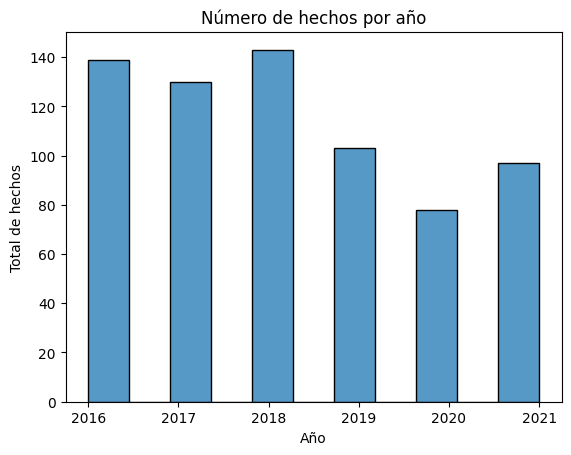

In [105]:
# Relación por número de hechos y año en el que ocurren.

sns.histplot(hechos,x = "AAAA")
plt.xlabel("Año")
plt.ylabel("Total de hechos")
plt.title("Número de hechos por año")
plt.show()

Como se demostró anteriormente, los años donde más ocurrieron hechos fueron en el 2016 y 2019. Siendo 2020 y 2021 los años con menor número de hechos registrados, en donde es importante tener en cuenta que estos dos años se vieron mayormente afectados por las pandemia de COVID-19. El año 2019 puede ser un periodo importante de revisión ya que se presenta una tendencia a la baja respecto a los tres periodos anteriores (2016 - 2018).

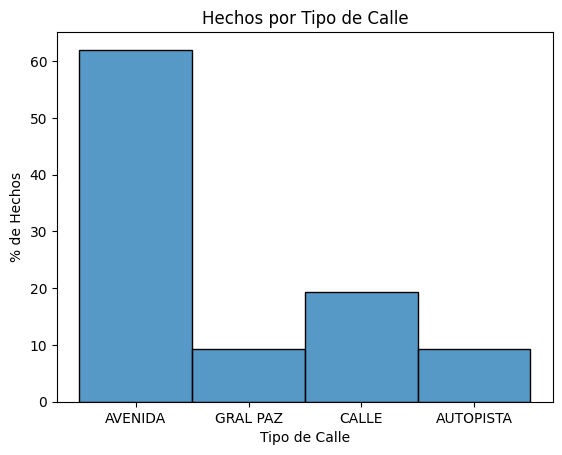

In [106]:
# Por tipo de calle.
sns.histplot(hechos, x = "TIPO_DE_CALLE",stat="percent")
plt.xlabel("Tipo de Calle")
plt.ylabel("% de Hechos")
plt.title("Hechos por Tipo de Calle")
plt.show()

En este gráfico observamos el porcentaje de hechos ocurridos por el tipo de calle. Para la data dada, la mayoría de los hechos ocurren en las avenidas (aproximadamente el 60%), seguida de las calles (aprox. 20%). Podría ser importante revisar en qué segmento de estas ocurren los hechos; es decir, si ocurren al momento en el que se produce un intercambio entre una avenida / calle con otra (cruces), o si ocurren durante el recorrido / tránsito de estas.  

In [107]:
# A partir de la pregunta anterior, se desea revisar el número de hechos que ocurren en cruces. Para ello se revisa el total de hechos registrados por tipo de calle y el total de hechos registrados que ocurren en cruces. 

conteo_cruces = hechos.groupby("TIPO_DE_CALLE")[["ID","Cruce"]].count().reset_index() # Se obtiene el número de hechos por tipo de calle, y el número de hechos que ocurren en cruces.
conteo_cruces["%_Representación"] = round((conteo_cruces["Cruce"]/conteo_cruces["ID"])*100,2) # Se obtiene el porcentaje de representación del Cruce para el total de hechos registrados para el tipo de calle en el que ocurre.

# Se observa la tabla resultado.
conteo_cruces

,TIPO_DE_CALLE,ID,Cruce,%_Representación
0,AUTOPISTA,64,27,42.19
1,AVENIDA,428,351,82.01
2,CALLE,134,90,67.16
3,GRAL PAZ,64,55,85.94


Para los cruces, se puede observar que tanto para avenidas, calles y General Paz, los hechos que ocurren en cruces representan la mayor parte de la muestra para cada una de estos tipos de calles. Esto nos puede dar una indicación de la importancia que puede ser el revisar correcta señalización, así como el tráfico en los cruces en donde ocurren estos accidentes (tomando en cuenta las comunas principales revisadas anteriormente). Si bien, en las autopistas los accidentes que ocurren en cruces son menores (debido al tipo de flujo que existen en este tipo de calle), siguen presentándose un importante número de este tipo de hecho. 

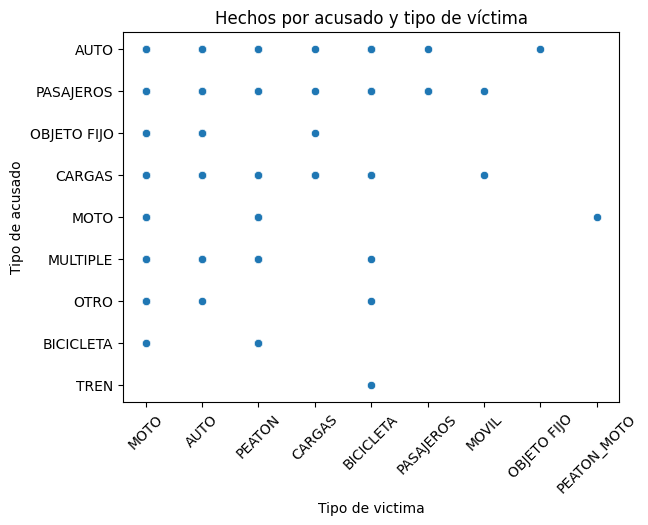

In [108]:
# Se observa a continuación las incidencias existentes por tipo de víctima y tipo de acusado.

sns.scatterplot(hechos,x="VICTIMA",y="ACUSADO")
plt.tick_params(axis="x",rotation=45)
plt.xlabel("Tipo de victima")
plt.ylabel("Tipo de acusado")
plt.title("Hechos por acusado y tipo de víctima")
plt.show()

La gráfica anterior nos permite observar el acontecimiento de hechos de acuerdo al tipo de acusado y al tipo de víctima. Como era de esperar, de acuerdo a los resultados anteriores respecto al número de hechos por tipo de acusado y tipo de víctima, los acusados por auto, pasajeros y carga presentan diversos tipos de víctimas. Como curiosidad de la muestra, sólo se presentan accidentes donde la víctima fue un móvil por razón de los pasajeros y vehículos de carga; así como sólo se registran víctimas de accidente por tren a bicicletas. 

## Homicidios - Víctimas

### Revisión de la base de datos.

In [109]:
# Se convierte la base de datos en un dataframe de pandas y se observa la composición de las primeras líneas de la base de datos.
victimas = pd.read_excel(ruta_homicidios, sheet_name= "VICTIMAS")
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [110]:
# Se observa la composición del dataframe.
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [112]:
# Se observa que la infomración correspondiente a FECHA_FALLECIMIENTO se encuentre en el formato adecuado.
print(f"El tipo de dato de la columna 'FECHA_FALLECIMIENTO' es: {type(victimas.loc[1,"FECHA_FALLECIMIENTO"])}")

# El dato que retorna es el esperado para un dato de tiempo.

El tipo de dato de la columna 'FECHA_FALLECIMIENTO' es: <class 'datetime.datetime'>


En este caso, el análisis de la información que nos arroja la base nos muestra que no se presentan datos nulos, sin embargo, se decide revisar que no se presenten datos en blanco (" ", "" o ".") para rol, víctima, sexo ni edad.

In [113]:
# Se filtran las bases de datos para revisar si se presentan cualquiera de los casos mencionados.

print("Para la columna 'victima':")
print(victimas[(victimas["VICTIMA"] == "") | (victimas["VICTIMA"] == " ") | (victimas["VICTIMA"] == ".")])


print("Para la columna 'rol':")
print(victimas[(victimas["ROL"] == "") | (victimas["ROL"] == " ") | (victimas["ROL"] == ".")])


print("Para la columna 'sexo':")
print(victimas[(victimas["SEXO"] == "") | (victimas["SEXO"] == " ") | (victimas["SEXO"] == ".")])


print("Para la columna 'edad':")
print(victimas[(victimas["EDAD"] == "") | (victimas["EDAD"] == " ") | (victimas["EDAD"] == ".")])

# En este caso, se comprueban que no existen datos nulos "válidos" por encontrarse en formato string.

Para la columna 'victima':
Empty DataFrame
Columns: [ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []
Para la columna 'rol':
Empty DataFrame
Columns: [ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []
Para la columna 'sexo':
Empty DataFrame
Columns: [ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []
Para la columna 'edad':
Empty DataFrame
Columns: [ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []


In [114]:
# Se observa que los datos en la columna "EDAD" se encuentran en formato string. Se deciden transformar a tipo entero para poder hacer revisión estadística de esta información posteriormente. Debido a que dentro de la columna de "victimas" existen datos como "SD" (sin identificar), se deciden convertir estos datos a nulo:

victimas["EDAD"] = pd.to_numeric(victimas["EDAD"],errors="coerce",downcast="integer")

In [116]:
# Se reemplazan todas las coincidencias para "SD" por datos nulos.
victimas.replace("SD",np.nan,inplace=True)

In [117]:
# Se observa la información obtenida. 
victimas.info()

# Donde se entiende que los datos nulos para edad son aquellos que no se pudieron identificar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  706 non-null    object        
 6   VICTIMA              708 non-null    object        
 7   SEXO                 711 non-null    object        
 8   EDAD                 664 non-null    float64       
 9   FECHA_FALLECIMIENTO  649 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.1+ KB


In [118]:
# Se observa un análisis para el dataframe obtenido.
victimas.describe()

,FECHA,AAAA,MM,DD,EDAD
count,717,717.000000,717.000000,717.000000,664.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948,42.167169
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,27.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,37.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,56.250000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.000000
std,NaN,1.672655,3.575140,8.683358,19.788034


In [119]:
# Se guarda la base de datos obtenidas.
victimas.to_csv("../Data/Corregidos/victimas.csv",index=False)

In [120]:
# Se observa que la base cargue adecuadamente. 
victimas = pd.read_csv("../Data/Corregidos/victimas.csv")
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 00:00:00


### Revisión estadística.

Se revisa la presencia de outliers para la base de datos a partir de la edad de las víctimas.

In [121]:
# Se calcula el Q1 (Primer cuartil) y Q3 (Tercer cuartil).
Q1 = victimas["EDAD"].quantile(0.25)
Q3 = victimas["EDAD"].quantile(0.75)

print(f"El primer cuartil es {Q1}")
print(f"El tercer cuartil es {Q3}")

# Se hace el cálculo del IQR (Rango Intercuartil).
IQR = Q3 - Q1
print(f"El rango intercuartil es {IQR}")

# Se establecen los límites para encontrar a los outliers.
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

# Filtrado de outliers
outliers = victimas[
    (victimas["EDAD"] < inferior) | (victimas["EDAD"] > superior)
]

# Se observan los casos de outliers
print("Los outliers identificados son:")
outliers

# En este caso, no se identifican outliers para la edad de las personas.

El primer cuartil es 27.0
El tercer cuartil es 56.25
El rango intercuartil es 29.25
Los outliers identificados son:


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


Observemos a continuación la composición del dataframe. En este caso, veremos primero la distribución de los datos para la columna rol, víctima y sexo.

ROL
CONDUCTOR               0.467422
PEATON                  0.378187
PASAJERO_ACOMPAÑANTE    0.113314
CICLISTA                0.041076
Name: proportion, dtype: float64


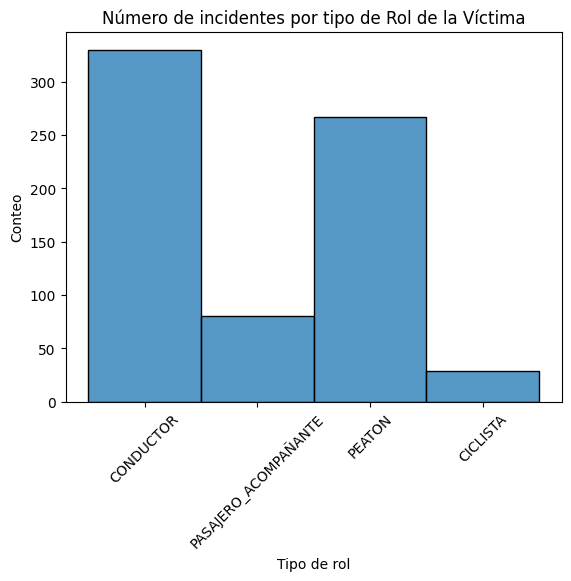

In [122]:
# Se imprime la distribución de los valores para estas tres columnas.

# ROL:
print(victimas["ROL"].value_counts(normalize=True))

# Se grafica el número de incidencias.
sns.histplot(victimas,x = "ROL")
plt.tick_params(axis="x",rotation=45)
plt.title("Número de incidentes por tipo de Rol de la Víctima")
plt.ylabel("Conteo")
plt.xlabel("Tipo de rol")
plt.show()

VICTIMA
MOTO         0.427966
PEATON       0.377119
AUTO         0.132768
BICICLETA    0.040960
CARGAS       0.009887
PASAJEROS    0.007062
MOVIL        0.004237
Name: proportion, dtype: float64


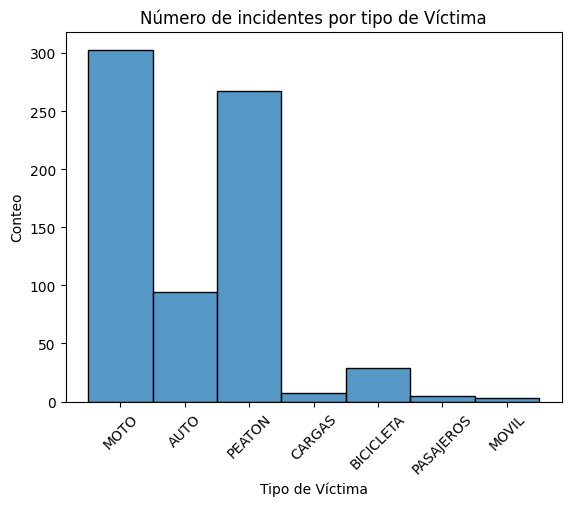

In [123]:
# VICTIMA:
print(victimas["VICTIMA"].value_counts(normalize=True))

# Se grafica el número de incidencias.
sns.histplot(victimas,x = "VICTIMA")
plt.tick_params(axis="x",rotation=45)
plt.title("Número de incidentes por tipo de Víctima")
plt.ylabel("Conteo")
plt.xlabel("Tipo de Víctima")
plt.show()

SEXO
MASCULINO    0.766526
FEMENINO     0.233474
Name: proportion, dtype: float64


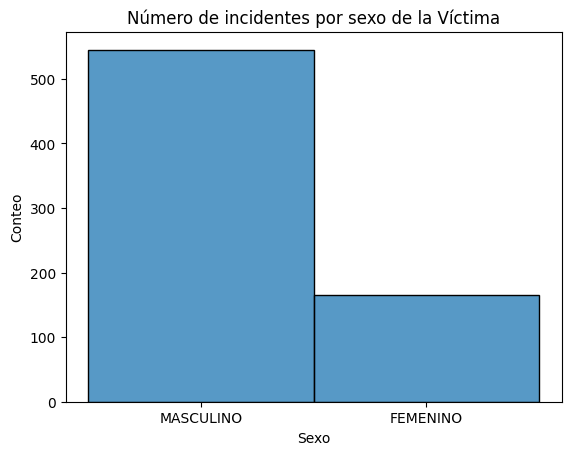

In [124]:
# SEXO:
print(victimas["SEXO"].value_counts(normalize=True))

# Se grafica el número de incidencias.
sns.histplot(victimas,x = "SEXO")
plt.title("Número de incidentes por sexo de la Víctima")
plt.ylabel("Conteo")
plt.xlabel("Sexo")
plt.show()

En este caso, los resultados nos permiten observar lo siguiente:

- Para el caso por tipo de rol, se observan que la mayor parte de las víctimas eran conductores (46%), esto resulta coherente con el dato del tipo de vehículo víctima de los accidentes (moto). La información aquí presente resulta coherente con los resultados de la base "hechos", por tipo de víctima. 

- Los incidentes por tipo de víctima resulta también coherente con la información presentada en la base de "hechos", donde la mayor incidencia de víctimas son motos, peatones y autos. Un hallazgo interesante de la muestra nos permite observar que las bicicletas, si bien son el 4to grupo de víctimas con más hechos, tiene un menor número de incidencias que los otros tres grupos. Esto nos podría invitar a revisar si el número de ciclistas en la calle es mucho menor que los otros tres grupos. En caso de que la diferencia de ciclistas no sea extremadamente elevada respecto a los primeros tres grupos, revisar más a detalle las rutas de los ciclistas y las diferencias que se presentan con peatones respecto, podría resultar de apoyo para pensar estrategias que reduzcan los hechos en este segundo grupo. 

- Finalmente, la mayoría de las víctimas son de sexo masculino (76% de los datos). Podría ser útil, en una segunda instancia, revisar si el número de conductores con pase, o el promedio de conductores diario, presenta una diferencia igual de significativa, ya que de presentarse una menor diferencia entre el número general de conductores por sexo, esto nos invitaría a revisar con más detalle los hábitos al volante y en la calle entre los dos sexos que puedan hacer propensos los accidentes. La muestra en sí misma, no obstante, nos invitaría a revisar estos mismos hábitos.

## Lesiones - Hechos

### Revisión de la base

In [44]:
# Se extrae la hoja 
lesiones = pd.read_excel(ruta_lesiones,sheet_name="HECHOS")
lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [45]:
# Se revisa el contenido de la hoja.
print(lesiones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [46]:
# Se deciden eliminar las siguientes columnas, ya que presentan información que puede obtenerse por la longitud y la latitud: 
lesiones.drop(columns=["direccion_normalizada","otra_direccion","calle","altura","geocodificacion_CABA"],inplace=True)

In [47]:
# Se observa la base obtenida. 
lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  23785 non-null  object
 1   n_victimas          23785 non-null  int64 
 2   aaaa                23785 non-null  int64 
 3   mm                  23785 non-null  int64 
 4   dd                  23785 non-null  int64 
 5   fecha               23785 non-null  object
 6   hora                23785 non-null  object
 7   franja_hora         23780 non-null  object
 8   comuna              23616 non-null  object
 9   tipo_calle          23785 non-null  object
 10  cruce               9407 non-null   object
 11  longitud            23523 non-null  object
 12  latutid             23523 non-null  object
 13  victima             23785 non-null  object
 14  acusado             23785 non-null  object
 15  participantes       23785 non-null  object
 16  moto                23

In [48]:
# Se observa que los datos en la columna "longitud" y "latutid" se encuentran en formato string. Se deciden transformar a tipo entero para poder hacer revisión estadística de esta información posteriormente. Debido a que dentro de la columna de "victimas" existen datos como "SD" (sin identificar), se deciden convertir estos datos a nulo:

lesiones["longitud"] = pd.to_numeric(lesiones["longitud"],errors="coerce",downcast="float")
lesiones["latutid"] = pd.to_numeric(lesiones["latutid"],errors="coerce",downcast="float")

lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [49]:
# Se renombra la columna "latutid" a "latitud":
lesiones.rename(columns={"latutid":"latitud"},inplace=True)

Para entender mejor la composición actual de la base de datos, se decide revisar la composición de las columnas comuna, tipo_calle, victima, acusado y gravedad, y conocer mejor cómo tratar los casos sin identificar.

In [50]:
# Se observa la composición de la base de datos para: comuna, tipo_calle, victima, acusado y gravedad.

# Comuna
print(lesiones["comuna"].value_counts(normalize=True))

comuna
1                  0.106961
15                 0.080793
4                  0.073213
3                  0.072747
9                  0.070884
14                 0.066946
7                  0.064194
12                 0.060976
11                 0.059748
13                 0.057376
10                 0.057038
5                  0.051914
8                  0.044970
6                  0.040523
2                  0.037178
SD                 0.035823
No Especificada    0.018716
Name: proportion, dtype: float64


In [51]:
# tipo_calle
print(lesiones["tipo_calle"].value_counts(normalize=True))

tipo_calle
SD           0.464368
AVENIDA      0.284843
CALLE        0.226319
GRAL PAZ     0.022619
AUTOPISTA    0.001850
Name: proportion, dtype: float64


In [52]:
# victima
print(lesiones["victima"].value_counts(normalize=True))

victima
SD                    0.451251
MOTO                  0.229598
CICLISTA              0.092874
AUTO                  0.085474
PEATON                0.085180
TRANSPORTE PUBLICO    0.028505
CAMIONETA             0.007946
TAXI                  0.007652
MOVIL                 0.004204
CAMION                0.003321
MIXTO                 0.001766
MONOPATIN             0.001177
OTRO                  0.000547
UTILITARIO            0.000505
Name: proportion, dtype: float64


In [53]:
# acusado
print(lesiones["acusado"].value_counts(normalize=True))

acusado
SD                    0.642758
AUTO                  0.195123
TRANSPORTE PUBLICO    0.040992
CAMIONETA             0.036662
MOTO                  0.026277
TAXI                  0.024848
CAMION                0.012108
OBJETO FIJO           0.011730
MOVIL                 0.003406
CICLISTA              0.003237
UTILITARIO            0.001177
OTRO                  0.001009
PEATON                0.000547
MONOPATIN             0.000126
Name: proportion, dtype: float64


In [54]:
# gravedad
print(lesiones["gravedad"].value_counts(normalize=True))

gravedad
SD       0.969350
GRAVE    0.026992
sd       0.003490
FATAL    0.000126
grave    0.000042
Name: proportion, dtype: float64


En todas las columnas se observa una elevada proporción de casos sin identificar. Se procede a eliminar la información para todas las columnas cuya información sea SD.

In [55]:
# Se reemplaza a "SD" por valores nulos.
lesiones.replace(["SD","sd","No Especificada"],np.nan,inplace=True)

C:\Users\dmon2\AppData\Local\Temp\ipykernel_19396\3928268670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lesiones.replace(["SD","sd","No Especificada"],np.nan,inplace=True)


In [56]:
# La información que encontramos en las columnas "moto","auto","transporte_publico", "camion" y "ciclista" se puede observar en "victima","acusado" y "participantes", por lo que se deciden eliminar por redundancia.

lesiones.drop(columns=["moto","auto","transporte_publico", "camion","ciclista"],inplace=True)

In [57]:
# Se observa la información obtenida. 
lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             23785 non-null  object 
 1   n_victimas     23785 non-null  int64  
 2   aaaa           23785 non-null  int64  
 3   mm             23785 non-null  int64  
 4   dd             23785 non-null  int64  
 5   fecha          23785 non-null  object 
 6   hora           23776 non-null  object 
 7   franja_hora    23776 non-null  float64
 8   comuna         22328 non-null  float64
 9   tipo_calle     12740 non-null  object 
 10  cruce          9407 non-null   object 
 11  longitud       22314 non-null  float64
 12  latitud        22314 non-null  float64
 13  victima        13052 non-null  object 
 14  acusado        8497 non-null   object 
 15  participantes  23785 non-null  object 
 16  gravedad       646 non-null    object 
dtypes: float64(4), int64(4), object(9)
memory usage: 3

In [58]:
# Se deciden eliminar todos los valores de las columnas anteriores se encuentran en nulo, ya que no serán de utilidad para el análisis posterior.
lesiones.dropna(subset=["comuna","tipo_calle","victima","acusado"],how="all",inplace=True)

In [59]:
# Se deciden eliminar todos los valores donde víctima y acusado sean nulos.
lesiones.dropna(subset=["victima","acusado"],how="all",inplace=True)

In [60]:
# se observa el resultado de la limpieza.
lesiones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13250 entries, 0 to 23784
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13250 non-null  object 
 1   n_victimas     13250 non-null  int64  
 2   aaaa           13250 non-null  int64  
 3   mm             13250 non-null  int64  
 4   dd             13250 non-null  int64  
 5   fecha          13250 non-null  object 
 6   hora           13245 non-null  object 
 7   franja_hora    13245 non-null  float64
 8   comuna         12520 non-null  float64
 9   tipo_calle     9479 non-null   object 
 10  cruce          7028 non-null   object 
 11  longitud       12538 non-null  float64
 12  latitud        12538 non-null  float64
 13  victima        13052 non-null  object 
 14  acusado        8497 non-null   object 
 15  participantes  13250 non-null  object 
 16  gravedad       449 non-null    object 
dtypes: float64(4), int64(4), object(9)
memory usage: 1.8+ M

In [61]:
# Se observa el dataframe.
lesiones

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,cruce,longitud,latitud,victima,acusado,participantes,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9.0,14.0,NaN,NaN,-5.840891e+01,-3.455966e+01,CICLISTA,NaN,CICLISTA-SD,NaN
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1.0,8.0,NaN,NaN,-5.844351e+01,-3.466913e+01,AUTO,NaN,AUTO-SD,NaN
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2.0,7.0,NaN,NaN,-5.843742e+01,-3.464735e+01,PEATON,NaN,PEATON-SD,NaN
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4.0,3.0,NaN,NaN,-5.839822e+01,-3.460458e+01,AUTO,NaN,AUTO-SD,NaN
5,LC-2019-0000136,2,2019,1,1,2019-01-01 00:00:00,08:05:00,8.0,15.0,NaN,NaN,-5.843939e+01,-3.458811e+01,MOTO,NaN,MOTO-SD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23746,LC-2021-0650349,1,2021,12,30,2021-12-30 00:00:00,06:38:00,6.0,15.0,CALLE,NaN,-5.847109e+01,-3.457845e+01,MOTO,AUTO,MOTO-AUTO,NaN
23768,LC-2021-0652048,1,2021,12,31,2021-12-31 00:00:00,01:45:00,1.0,4.0,AVENIDA,"BARROS PAZOS, JOSE",-5.843110e+01,-3.464592e+01,MOTO,CAMION,MOTO-CAMION,NaN
23773,LC-2021-0652316,5,2021,12,31,2021-12-31 00:00:00,09:00:00,9.0,13.0,CALLE,"PEDRAZA, MANUELA",-5.846064e+01,-3.454839e+01,AUTO,NaN,AUTO-SD,NaN
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22.0,5.0,CALLE,MORENO,-5.841453e+01,-3.461429e+01,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,GRAVE


In [62]:
# Se observa el análisis estadístico de los datos obtenidos. 
lesiones.describe()

,n_victimas,aaaa,mm,dd,franja_hora,comuna,longitud,latitud
count,13250.000000,13250.000000,13250.000000,13250.000000,13245.000000,12520.000000,1.253800e+04,1.253800e+04
mean,1.131547,2020.177811,6.287849,15.465736,13.568290,8.167891,-4.650419e+05,-2.770238e+05
std,0.491279,0.782048,3.605438,8.773622,5.651269,4.668781,5.206570e+07,3.101537e+07
min,1.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,-5.829963e+09,-3.472891e+09
25%,1.000000,2020.000000,3.000000,8.000000,10.000000,4.000000,-5.847721e+01,-3.463209e+01
50%,1.000000,2020.000000,6.000000,15.000000,14.000000,9.000000,-5.844159e+01,-3.461093e+01
75%,1.000000,2021.000000,9.000000,23.000000,18.000000,12.000000,-5.840546e+01,-3.458903e+01
max,10.000000,2021.000000,12.000000,31.000000,23.000000,15.000000,-5.835346e+01,-3.453466e+01


Se observan outliers por número de víctimas.

In [63]:
# Se calcula el Q1 (Primer cuartil) y Q3 (Tercer cuartil).
Q1 = lesiones["n_victimas"].quantile(0.25)
Q3 = lesiones["n_victimas"].quantile(0.75)

print(f"El primer cuartil es {Q1}")
print(f"El tercer cuartil es {Q3}")

# Se hace el cálculo del IQR (Rango Intercuartil).
IQR = Q3 - Q1
print(f"El rango intercuartil es {IQR}")

# Se establecen los límites para encontrar a los outliers.
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR

# Filtrado de outliers
outliers = lesiones[
    (lesiones["n_victimas"] < inferior) | (lesiones["n_victimas"] > superior)
]

# Se observan los casos de outliers
print("Los outliers identificados son:")
outliers

# En este caso, no se identifican outliers para la edad de las personas.

El primer cuartil es 1.0
El tercer cuartil es 1.0
El rango intercuartil es 0.0
Los outliers identificados son:


,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,cruce,longitud,latitud,victima,acusado,participantes,gravedad
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4.0,3.0,NaN,NaN,-58.398225,-34.604579,AUTO,NaN,AUTO-SD,NaN
5,LC-2019-0000136,2,2019,1,1,2019-01-01 00:00:00,08:05:00,8.0,15.0,NaN,NaN,-58.439392,-34.588108,MOTO,NaN,MOTO-SD,NaN
11,LC-2019-0000445,3,2019,1,1,2019-01-01 00:00:00,13:40:00,13.0,11.0,NaN,NaN,-58.524662,-34.603255,AUTO,NaN,AUTO-SD,NaN
20,LC-2019-0000963,5,2019,1,2,2019-01-02 00:00:00,08:30:00,8.0,6.0,NaN,NaN,-58.447266,-34.622984,TRANSPORTE PUBLICO,NaN,TRANSPORTE PUBLICO-SD,NaN
60,LC-2019-0006068,2,2019,1,4,2019-01-04 00:00:00,02:49:00,2.0,3.0,NaN,NaN,-58.397630,-34.617325,MOTO,NaN,MOTO-SD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,LC-2021-0642674,2,2021,12,26,2021-12-26 00:00:00,01:00:00,1.0,9.0,CALLE,"SUAREZ, JOSE LEON",-58.501270,-34.672195,PEATON,CAMIONETA,PEATON-CAMIONETA,NaN
23703,LC-2021-0645171,2,2021,12,27,2021-12-27 00:00:00,17:00:00,17.0,6.0,AVENIDA,MIRO,-58.449112,-34.625994,MOTO,AUTO,MOTO-AUTO,NaN
23713,LC-2021-0646632,3,2021,12,28,2021-12-28 00:00:00,09:00:00,9.0,1.0,AVENIDA,"CEVALLOS, VIRREY",-58.388654,-34.622559,PEATON,MOTO,PEATON-MOTO,NaN
23741,LC-2021-0649913,2,2021,12,29,2021-12-29 00:00:00,23:05:00,23.0,12.0,CALLE,LUGONES,-58.479975,-34.570591,MOTO,MOTO,MOTO-MOTO,NaN


In [64]:
# Se quiere observar los diferentes números de víctimas que se obtuvieron para los outliers:
outliers["n_victimas"].unique()

# En este caso, hace sentido que existan un número de heridos mayores a uno, tales como 2, 3 y 4. Sin embargo, hay otros datos que se alejan más del límite superior.

array([ 4,  2,  3,  5, 10,  8,  7,  6], dtype=int64)

Se quieren observan los datos de los outliers que se alejan enormemente de la media (de acuerdo al resultado del describe anterior, la desviación para el número de víctimas es de 0.491279, donde el promedio es 1.131547), en este caso, se entenderán como "enormemente alejados de la media" como aquellos que están por encima de 9 desviaciones estándar del promedio.

In [65]:
# Se observan los casos de los outliers que se alejan enormemente de la media.

desviacion = lesiones["n_victimas"].std()
promedio = lesiones["n_victimas"].mean()

print(f"La desviación estándar es de {desviacion}")
print(f"La media es de {promedio}")

alejados = (desviacion*9)+promedio

print(f"Los datos enormemente alejados de la media son aquellos mayores a {alejados}, los cuales son:")
outliers[outliers["n_victimas"] > alejados]

La desviación estándar es de 0.4912790113828907
La media es de 1.1315471698113209
Los datos enormemente alejados de la media son aquellos mayores a 5.553058272257338, los cuales son:


,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,cruce,longitud,latitud,victima,acusado,participantes,gravedad
524,LC-2019-0049800,10,2019,1,23,2019-01-23 00:00:00,18:30:00,18.0,7.0,NaN,NaN,-58.443316,-34.642061,OTRO,NaN,OTRO-SD,NaN
4138,LC-2019-0315787,8,2019,5,20,2019-05-20 00:00:00,23:15:00,23.0,1.0,NaN,NaN,-58.389660,-34.625064,TRANSPORTE PUBLICO,NaN,TRANSPORTE PUBLICO-SD,NaN
4589,LC-2019-0348447,8,2019,6,4,2019-06-04 00:00:00,12:40:00,12.0,10.0,NaN,NaN,-58.525719,-34.621259,AUTO,NaN,AUTO-SD,NaN
6164,LC-2019-0459476,8,2019,7,25,2019-07-25 00:00:00,01:00:00,1.0,15.0,NaN,NaN,-58.448650,-34.592646,TRANSPORTE PUBLICO,NaN,TRANSPORTE PUBLICO-SD,NaN
11634,LC-2020-0087811,7,2020,2,10,2020-02-10 00:00:00,04:40:00 p.m.,16.0,15.0,AVENIDA,"CARRIL, SALVADOR MARIA DEL AV.",-58.498201,-34.590701,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO-TRANSPORTE PUBLICO,NaN
11871,LC-2020-0112197,8,2020,2,20,2020-02-20 00:00:00,09:50:00 a.m.,9.0,1.0,CALLE,SAN JOSE,-58.385958,-34.614551,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO-TRANSPORTE PUBLICO,NaN
12508,LC-2020-0188608,8,2020,4,4,2020-04-04 00:00:00,08:50:00 a.m.,8.0,9.0,GRAL PAZ,"CASTRO, EMILIO AV.",-58.525766,-34.656887,MIXTO,CAMION,MIXTO-CAMION,NaN
14821,LC-2020-0590451,7,2020,10,31,2020-10-31 00:00:00,05:09:00 a.m.,5.0,15.0,CALLE,SERRANO,-58.443686,-34.597243,MIXTO,TRANSPORTE PUBLICO,MIXTO-TRANSPORTE PUBLICO,NaN
15691,LC-2020-0660293,6,2020,12,15,2020-12-15 00:00:00,10:00:00 p.m.,22.0,9.0,GRAL PAZ,"PERON, EVA AV.",-58.502518,-34.674503,AUTO,AUTO,AUTO-AUTO,NaN
18133,LC-2021-0118684,6,2021,3,15,2021-03-15 00:00:00,17:50:00,17.0,1.0,CALLE,NaN,-58.383180,-34.622756,CAMION,TRANSPORTE PUBLICO,CAMION-TRANSPORTE PUBLICO,GRAVE


En este caso se observa que los outliers encontrados para los datos que se alejan enormente de la media hacen sentido por el tipo de vehículos participante en el accidente. Dos autos pueden causar accidentes de hasta 10 personas si se cuentan sólo los pasajeros de cada vehículo, mientras que en el caso del transporte público también hace sentido que se puedan presentar número elevado de víctimas.

Especialmente llaman la atención la línea 524 (otro - sd), 4589(auto - sd), y 22339 (movil - auto).

Sin embargo, a falta de mayor contexto para entender estos tres datos, se deciden dejar en la muestra.

In [66]:
# El total de outliers en la muestra respecto a la muestra total es el siguiente:
n_out = outliers["id"].count()
muestra = lesiones["id"].count()

print(f"El total de outliers es de {n_out} lo que representa {round((n_out/muestra),4)*100} % de la muestra total")

# En este caso, los outliers representan el 9.7% de la muestra total de datos, lo que sigue siendo una importante parte de la muestra total. Se deciden dejar los datos obtenidos.

El total de outliers es de 1288 lo que representa 9.719999999999999 % de la muestra total


In [67]:
# Se corrige en gravedad a "grave" por "GRAVE"
lesiones["gravedad"].replace("grave","GRAVE",inplace=True)

C:\Users\dmon2\AppData\Local\Temp\ipykernel_19396\2283647872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lesiones["gravedad"].replace("grave","GRAVE",inplace=True)


In [68]:
# Es de notar que dentro de la categorización para las víctimas y para los acusados se presenta el término "camioneta". Al revisar el diccionario de datos para esta base, este concepto no se encuentra definido; por lo que se hace una suposición respecto a este dato, entendiendo que hace parte del grupo "camion", el cual sí está definido dentro del diccionario del dataset, pero fue escrito de manera diferente por razones humanas.

# Se decide cambiar las ocurrencias de "camioneta" a "camión"
lesiones["victima"].replace("CAMIONETA","CAMION",inplace=True)
lesiones["acusado"].replace("CAMIONETA","CAMION",inplace=True)

C:\Users\dmon2\AppData\Local\Temp\ipykernel_19396\2633878523.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lesiones["victima"].replace("CAMIONETA","CAMION",inplace=True)
C:\Users\dmon2\AppData\Local\Temp\ipykernel_19396\2633878523.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [69]:
# Se guarda la base de datos trabajada.
lesiones.to_csv("../Data/Corregidos/lesiones_hechos.csv",index_label=False)

In [70]:
# Se revisa que la base cargue adecuadamente.
lesiones = pd.read_csv("../Data/Corregidos/lesiones_hechos.csv")
lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,cruce,longitud,latitud,victima,acusado,participantes,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9.0,14.0,NaN,NaN,-58.408911,-34.559658,CICLISTA,NaN,CICLISTA-SD,NaN
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1.0,8.0,NaN,NaN,-58.443510,-34.669125,AUTO,NaN,AUTO-SD,NaN
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2.0,7.0,NaN,NaN,-58.437425,-34.647349,PEATON,NaN,PEATON-SD,NaN
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4.0,3.0,NaN,NaN,-58.398225,-34.604579,AUTO,NaN,AUTO-SD,NaN
5,LC-2019-0000136,2,2019,1,1,2019-01-01 00:00:00,08:05:00,8.0,15.0,NaN,NaN,-58.439392,-34.588108,MOTO,NaN,MOTO-SD,NaN


### Revisión estadística

A partir de la base de datos se revisan algunas relaciones.

In [71]:
# Observemos inicialmente el describe nuevamente de la base de datos.

lesiones.describe()

,n_victimas,aaaa,mm,dd,franja_hora,comuna,longitud,latitud
count,13250.000000,13250.000000,13250.000000,13250.000000,13245.000000,12520.000000,1.253800e+04,1.253800e+04
mean,1.131547,2020.177811,6.287849,15.465736,13.568290,8.167891,-4.650419e+05,-2.770238e+05
std,0.491279,0.782048,3.605438,8.773622,5.651269,4.668781,5.206570e+07,3.101537e+07
min,1.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,-5.829963e+09,-3.472891e+09
25%,1.000000,2020.000000,3.000000,8.000000,10.000000,4.000000,-5.847721e+01,-3.463209e+01
50%,1.000000,2020.000000,6.000000,15.000000,14.000000,9.000000,-5.844159e+01,-3.461093e+01
75%,1.000000,2021.000000,9.000000,23.000000,18.000000,12.000000,-5.840546e+01,-3.458903e+01
max,10.000000,2021.000000,12.000000,31.000000,23.000000,15.000000,-5.835346e+01,-3.453466e+01


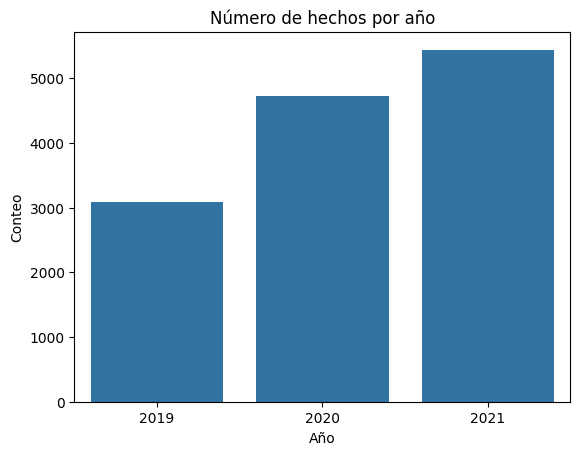

In [72]:
# Observemos la distribución del número de hechos registrados por el año.

sns.countplot(lesiones,x="aaaa")
plt.title("Número de hechos por año")
plt.xlabel("Año")
plt.ylabel("Conteo")
plt.show()

En contraposición a lo observado en las base de hechos para homicidios, la tendencia para los datos de lesiones presenta un incremento del número de registro para los años. Si bien, en este caso la muestra presenta datos sólo desde el 2019 hasta el 2021, podría ser importante considerar esta información al momento de revisar la información.

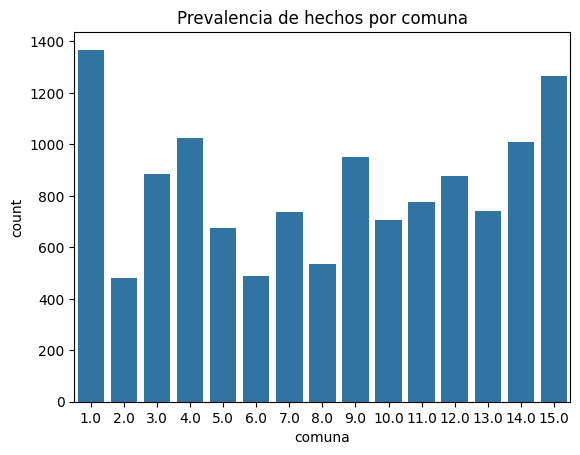

In [73]:
# Observación de ocurrencias por comuna.
sns.countplot(lesiones,x= "comuna")
plt.title("Prevalencia de hechos por comuna")
plt.show()

Respecto a la base de hechos para homicidios, se observa que la comuna 1 sigue siendo aquella en la que se presentan más número de hechos. Sin embargo, se observa un incremento en la aparición de la comunca 15 y 14 respecto a la base de homicidios. Esto nos podría indicar que, si bien en las comunas 1, 4 y 9 se presentan mayor número de hechos con homicidios, las comunas 14 y 15 deben también ser tenidas en cuenta para reducir los hechos.

Observemos la proporción de cada una de las comunas a continuación:

In [74]:
# Proporción de hechos por comuna.
print("Proporción de hechos por comuna")
lesiones["comuna"].value_counts(normalize=True)

Proporción de hechos por comuna


comuna
1.0     0.109265
15.0    0.101118
4.0     0.081949
14.0    0.080511
9.0     0.075879
3.0     0.070607
12.0    0.070128
11.0    0.062061
13.0    0.059185
7.0     0.058866
10.0    0.056390
5.0     0.054073
8.0     0.042732
6.0     0.038978
2.0     0.038259
Name: proportion, dtype: float64

En este caso, la revisión de la proporción nos muestra que el segundo lugar con número de hechos lo toma la comuna 15, siendo la comuna 4 desplazada al tercer lugar, donde la cuarta posición es tomada por la comuna 14 y la quinta por la comuna 9. 

Es importante notar que la comuna 3 y 12 también presentan un elevando número de casos, siguiendo muy de cerca a la comuna 9.

In [75]:
# Proporción por víctima.
print("Proporción por tipo de víctima:")
lesiones["victima"].value_counts(normalize=True)

Proporción por tipo de víctima:


victima
MOTO                  0.418403
CICLISTA              0.169246
AUTO                  0.155762
PEATON                0.155225
TRANSPORTE PUBLICO    0.051946
CAMION                0.020533
TAXI                  0.013944
MOVIL                 0.007662
MIXTO                 0.003218
MONOPATIN             0.002145
OTRO                  0.000996
UTILITARIO            0.000919
Name: proportion, dtype: float64

A diferencia del número de hechos en homicidos, aquí los ciclistas toman una mayor proporción del número de hechos en los cuales son víctima. Esto implicaría que, si bien el son el segundo grupo de víctimas con mayor número de accidentes de tráfico, el número de casos donde se presentan homicidios es mucho menor en comparación a los otros tres grupos con mayor número de accidentes (motos, autos y peatones)

Es de notar que la proporción de accidentes donde la víctima es una moto, es muy similar a la registrada en el dataset de homicidios. Así mismo, la proporción del número de peatones como víctimas en los hechos con homicidio es mayor. Estos dos grupos nos invitarían a hacer una revisión más extendida, ya que la información parece sugerir que son los grupos de víctimas más propensos a sufrir de accidentes fatales.

In [76]:
# Proporción de hechos por tipo de acusado.
print("Proporción por tipo de acusado")
lesiones["acusado"].value_counts(normalize=True)

Proporción por tipo de acusado


acusado
AUTO                  0.546193
CAMION                0.136519
TRANSPORTE PUBLICO    0.114746
MOTO                  0.073555
TAXI                  0.069554
OBJETO FIJO           0.032835
MOVIL                 0.009533
CICLISTA              0.009062
UTILITARIO            0.003295
OTRO                  0.002825
PEATON                0.001530
MONOPATIN             0.000353
Name: proportion, dtype: float64

En este caso, los tres mayores grupos de acusados para los hechos registrados son autos (54.6% de la muestra), camiones (13,7%) y vehículos de transporte público (11.5%). Los dos primeros puestos son coherentes con lo registrado en la base de hechos con homicidios (donde la categoría "camion" en lesiones, por su definición es similar a la categoría "cargas" en el dataset de homicidios). 

En este caso, habría una necesidad de revisión de los hechos causados por pasajeros, ya que no es una categoría que aparezca en el dataset de lesiones, y podría resultar importante contar con esta agregación también en este dataset para comparaciones. 

Finalmente, los vehículos de transporte público aparecen como el tercer grupo con mayor proporción como acusados de los accidentes de tráfico registrados. Esto podría ser importante al momento de pensar estrategias para reducir el número de hechos, ya que es una población con la que se puede tener una capacitación más directa, así como un mejor seguimiento; en comparación a los grupos de conductores privados (carros y camiones).